<a href="https://colab.research.google.com/github/Marie00127/CV_Study_VISIONEERS/blob/main/CV_W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**4.1 선형 회귀**
선형 회귀: 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것

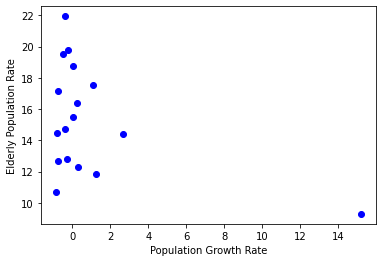

In [ ]:
#인구증가율과 고령인구비율 사이에 어떤 경향성이 있는지 선형 회귀로 예측
#데이터 시각화 먼저 진행

import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

오른쪽 아래에 치우친 하나의 점을 극단치(outlier)라고 부른다.

[0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]


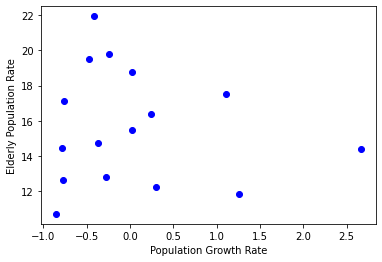

In [ ]:
#극단치 제거한 그래프
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
print(population_inc)
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

데이터의 경향성을 설명하는 직선과 각 데이터의 차이를 잔차라고 한다. 잔차를 최소화하는 알고리즘을 최소제곱법이라고 한다. 최소제곱법으로 직선의 기울기와 절편을 구할 수 있다.

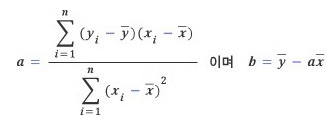

최소제곱법: https://terms.naver.com/entry.naver?docId=3569970&cid=58944&categoryId=58970 

a:  -0.355834147915461  b:  15.669317743971302


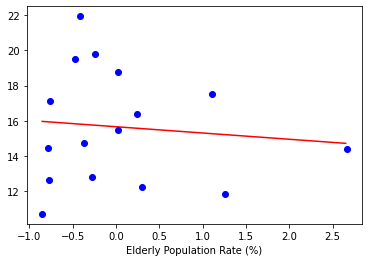

In [ ]:
#최소제곱법으로 a, b 직접 계산하여 회귀선 구하기
#인구증가율을 X로, 고령인구비율은 Y로 놓고 회귀선 구하기

import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#X, Y 평균 구하기
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

#최소제곱법으로 a, b 구하기
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a: ', a, ' b: ', b)

#그래프를 그리기 위해 회귀선의 x, y 데이터 구하기
#두 개 이상의 리스트를 하나로 묶는 list(zip(list_1, list_2)) 기법 사용

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

#붉은색 실선으로 회귀선을 그린다
plt.plot(line_x, line_y, 'r-')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.xlabel('Elderly Population Rate (%)')
plt.show()

위와 같이 하나의 데이터가 증가할 때 다른 하나가 감소하면 음의 상관관계가 있다고 한다.

복잡한 수식과 최소제곱법을 쓰지 않고도 텐서플로를 이용하여 회귀선을 구할 수 있다. 최소제곱법으로 그렸을 때와 거의 비슷한 회귀선을 보여준다. 다만, 다양한 난수가 사용되기에 결과는 시도할 때마다 달라질 수 있다.

99 a:  0.11740282 b:  6.8161325 loss:  87.97789
199 a:  -0.12210486 b:  11.283043 loss:  28.975584
299 a:  -0.25963315 b:  13.863813 loss:  13.033089
399 a:  -0.3234002 b:  15.060586 loss:  10.150499
499 a:  -0.34692135 b:  15.502044 loss:  9.808719
599 a:  -0.35384697 b:  15.632022 loss:  9.78219
699 a:  -0.35547733 b:  15.662622 loss:  9.7808485
799 a:  -0.3557832 b:  15.668362 loss:  9.780805
899 a:  -0.35582832 b:  15.669211 loss:  9.780804
999 a:  -0.35583332 b:  15.669302 loss:  9.780805


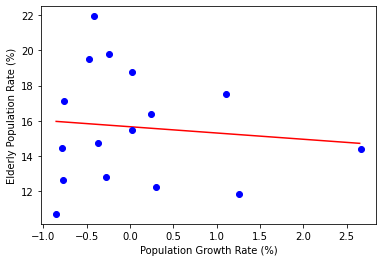

In [ ]:
#텐서플로로 구현하기

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a, b를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

#잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2) #기대출력에서 실제출력 빼기 (잔차)
  return loss

optimizer = tf.optimizers.Adam(learning_rate = 0.07)
#optimizer(최적화 함수): 복잡한 미분 계산 및 가중치 업데이트를 자동으로 진행해주는 도구

for i in range(1000):
  #잔차의 제곱의 평균을 최소화한다
  #첫번째 인수: 최소화할 손실을 전달, 두번째 인수: var_list에 학습시킬 변수 리스트를 전달. 
  optimizer.minimize(compute_loss, var_list = [a, b])

  if i % 100 == 99:
    print(i, 'a: ', a.numpy(), 'b: ', b.numpy(), 'loss: ', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b 

#그래프 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

손실을 최소화하는 것이 딥러닝을 포함한 머신러닝의 주요 알고리즘이다.

loss의 최솟값을 찾아가는 것을 최적화(optimization)라고 하고, 이를 수행하는 알고리즘이 최적화 알고리즘(optimizer)이다.

텐서플로2.0에서는 여러 곳에 분산돼 있던 optimizer를 tf.optimizer 아래로 모았기에 Adam optimizer를 불러왔다.

Adam은 SGD와 함께 가장 많이 쓰이는 최적화 함수 중 하나이다.

적당한 학습률(learning rate)를 넣으면 안정적이고 효율적으로 학습한다. 보통 학습률은 0.1 ~ 0.0001 값을 사용한다.

Adam: https://sonsnotation.blogspot.com/2020/11/6-optimization-for-deep-learning.html

추가

Momentum Algorithm: https://velog.io/@minjung-s/Optimization-Algorithm 

RMSProp(1): https://light-tree.tistory.com/141
RMSProp(2): https://mole-starseeker.tistory.com/48


위의 코드 중 for문에서 1000번 동안 학습시키면서 optimizer.minimize() 함수를 실행한다. 여기서 첫번째 인수에는 최소화할 손실을 전달하고, 두번째 인수인 var_list에는 학습시킬 변수 리스트를 전달해야한다. 학습을 거쳐 a, b는 잔차의 제곱의 평균을 최소화하는 적절한 값에 도달한다.

# **4.2 다항 회귀**

비성형 회귀: 선형 회귀로는 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀

다항회귀: 다항식을 이용한 회귀

즉, 회귀선이 직선 대신 2차 함수, 3차함수 등의 곡선이 되는 것이다.

위의 코드에서 c를 추가하고, a, b를 각각 2차항과 1차항의 계수로 바꿨으며, y_pred를 2차 함수 식으로 변환했다.

직선 회귀선보다 손실이 소량 감소했다.

99 a:  4.208437 b:  -6.1784177 c:  6.1880174 loss:  72.009315
199 a:  2.948178 b:  -4.7075386 c:  10.016206 loss:  33.65778
299 a:  1.3839041 b:  -2.4000714 c:  12.7231455 loss:  16.909126
399 a:  0.38974762 b:  -0.93218446 c:  14.443197 loss:  11.248189
499 a:  -0.15136258 b:  -0.1335822 c:  15.3816805 loss:  9.792309
599 a:  -0.4066948 b:  0.24322107 c:  15.824729 loss:  9.505218
699 a:  -0.5114789 b:  0.39785254 c:  16.006567 loss:  9.461673
799 a:  -0.5489351 b:  0.45312735 c:  16.071562 loss:  9.456596
899 a:  -0.5605834 b:  0.47031617 c:  16.091778 loss:  9.456142
999 a:  -0.5637274 b:  0.47495642 c:  16.09723 loss:  9.456113


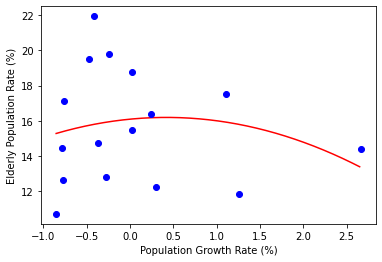

In [ ]:
#2차 함수

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a, b, c를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

#잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
  y_pred = a * X*X + b * X + c
  loss = tf.reduce_mean((Y - y_pred) ** 2) #기대출력에서 실제출력 빼기 (잔차)
  return loss

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07) #optimizer(최적화 함수): 복잡한 미분 계산 및 가중치 업데이트를 자동으로 진행해주는 도구

for i in range(1000):
  #잔차의 제곱의 평균을 최소화한다
  optimizer.minimize(compute_loss, var_list = [a, b, c])

  if i % 100 == 99:
    print(i, 'a: ', a.numpy(), 'b: ', b.numpy(), 'c: ', c.numpy(), 'loss: ', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x + b * line_x + c 

#그래프 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

d를 추가하면 3차 함수로도 나타낼 수 있다.

99 a:  -1.1191221 b:  5.8316836 c:  -4.081535 d:  6.170802 loss:  65.784966
199 a:  -2.0160122 b:  6.9500046 c:  -2.3188949 d:  9.769598 loss:  31.717024
299 a:  -1.7496636 b:  5.376342 c:  -0.97281754 d:  11.951832 loss:  20.778385
399 a:  -1.0232724 b:  3.0833862 c:  -0.5973422 d:  13.465644 loss:  14.752215
499 a:  -0.3100399 b:  0.990375 c:  -0.4937636 d:  14.611086 loss:  11.254166
599 a:  0.25760987 b:  -0.6541014 c:  -0.4465465 d:  15.475517 loss:  9.422691
699 a:  0.6705877 b:  -1.8478032 c:  -0.41653466 d:  16.098145 loss:  8.564503
799 a:  0.95227313 b:  -2.661619 c:  -0.39666906 d:  16.52186 loss:  8.203951
899 a:  1.1333222 b:  -3.1846106 c:  -0.38401666 d:  16.793993 loss:  8.068082
999 a:  1.2430931 b:  -3.5016901 c:  -0.37636456 d:  16.958958 loss:  8.022192


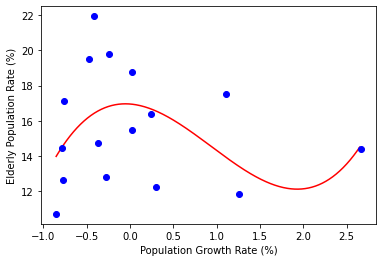

In [ ]:
#3차 함수

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a, b, c, d를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

#잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
  y_pred = a * X*X*X + b * X*X + c * X + d
  loss = tf.reduce_mean((Y - y_pred) ** 2) #기대출력에서 실제출력 빼기 (잔차)
  return loss

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07) #optimizer(최적화 함수): 복잡한 미분 계산 및 가중치 업데이트를 자동으로 진행해주는 도구
for i in range(1000):
  #잔차의 제곱의 평균을 최소화한다
  optimizer.minimize(compute_loss, var_list = [a, b, c, d])

  if i % 100 == 99:
    print(i, 'a: ', a.numpy(), 'b: ', b.numpy(), 'c: ', c.numpy(), 'd: ', d.numpy(), 'loss: ', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x*line_x + b * line_x*line_x + c * line_x + d 

#그래프 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

책과 다르게 2차 함수보다 loss가 줄었고, 그래프도 다르게 출력 되었다.

3차원 이상으로 늘리거나, 다항 회귀에서 더 나아가 비선형 회귀를 적용해볼 수도 있다.

어느 것이 적절한 회귀식인지 즉시 알기 어렵기에 식을 계속 바꿔보면서 최적의 회귀식을 찾기 위해 노력해야 한다.

텐서플로를 이용하면 선형, 다항, 비선형회귀가 아닌 딥러닝 네트워크를 이용한 회귀를 시도할 수 있다.

# **4.3 딥러닝 네트워크를 이용한 회귀**

딥러닝 model은 2개의 Dense 레이어로 구성된다. 첫번째 Dense 레이어는 활성화함수로 tanh를 사용했다. 

tanh: 하이퍼볼릭 탄젠트 함수, 삼각함수 중 탄젠트 함수와 연관, 실수 입력 받아 -1 ~ 1 사이의 출력을 반환 (시그모이드 함수는 0 ~ 1 상이의 출력을 반환)

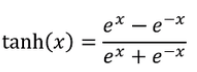

In [ ]:
#딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
          tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
          tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1), loss='mse')

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 6)                 12        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


첫번째 레이어에는 6개의 뉴런을 할당했다. 뉴런이 많을수록 딥러닝 네트워크 표현력이 좋아지지만 너무 많으면 학습이 제대로 되지 않거나 과적합 될 수 있다. 

두 번째 레이어는 X 입력값에 대한 하나의 Y값만 출력해야 하기 때문에 뉴런 수가 1개이다.

optimizer의 손실은 평균 제곱 오차(mse)로, 잔차의 제곱의 평균이 되기 때문에 선형 회귀 및 다항 회귀와 같이 잔차를 줄이는 방향으로 학습하게 된다.

In [ ]:
model.fit(X, Y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 280ms/step - loss: 256.0068
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 123.0774
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 9.5736
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 9.5138
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 9.4848
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 9.4581
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 9.4288
Epoch 8/10
1/1 [==============================] - 0s 22ms/step - loss: 9.3958
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 9.3584
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 9.3161


10회 학습.

진행될수록 손실에 거의 줄어들지 않는 것을 확인할 수 있다.

손실 변화가 거의 없으면 학습이 거의 다 된 것이다.
충분히 학습했다고 판단하면 종료해야된다. 그렇지 않으면 과적합되어 새로운 데이터가 들어왔을 때 잘못된 값을 도출할 수 있다.

검증 데이터를 설정하는 것은 학습을 언제 멈출지 결정하는 데 좋은 기준이 된다.

학습이 끝나면 어떤 값을 예측하는지 확인해야 한다. 학습이 잘 되었는지 그래프 그려서 확인하는 것이 좋다.

In [ ]:
model.predict(X)

array([[16.014282],
       [15.47916 ],
       [15.323238],
       [16.030378],
       [15.481541],
       [16.025692],
       [15.951708],
       [15.804355],
       [15.492031],
       [15.877863],
       [15.38447 ],
       [15.850232],
       [15.936802],
       [16.029198],
       [15.504744],
       [13.782443]], dtype=float32)

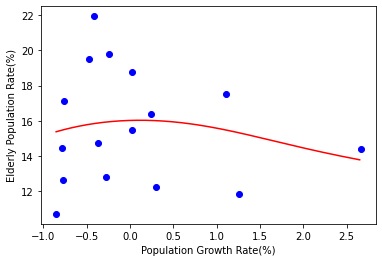

In [ ]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate(%)')
plt.ylabel('Elderly Population Rate(%)')
plt.show()

회귀선이 2차함수와 비슷하지만 완만한 형태로 나왔다. 

# **4.4 보스턴 주택 가격 데이터세트**

보스턴 주택 가격 데이터세트는 머신러닝을 공부하는 사람들은 한 번씩은 봤을 정도로 유명한 데이터세트이다.

보스턴 주택 가격 데이터세트를 이용한 주택 가격 예측 네트워크를 만들 것이다.

1978년 미국 보스턴 지역의 주택 가격. 

범죄율, 주택당 방 개수, 고속도로까지의 거리 등 13가지 데이터를 이용

In [ ]:
from tensorflow.keras.datasets import boston_housing
#load_data()를 이용하여 데이터 불러오기
#train과 test로 나누기
(train_X, train_Y),(test_X, test_Y) = boston_housing.load_data()

훈련 데이터로 학습할 때 일부 데이터를 검증 데이터로 만들 수 있다.
검증 데이터의 성적이 잘 나오지 않을 때 학습을 중단할 수도 있다. 

보스턴 주택 가격 데이터 세트는 훈련 데이터 404개, 테스트 데이터 102개이다. (80:20)
검증 데이터를 만들 때 훈련 데이터의 일부를 사용, 보통 전체 데이터의 20% 정도를 사용한다. (60:20:20)

In [ ]:
print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


데이터를 살펴보면 각 데이터의 단위가 다르다. 딥러닝에서는 이러한 데이터를 전처리하여 정규화(Standardization) 해야 학습 효율이 좋다.

데이터를 정규화하려면 각 데이터에서 평균값을 뺀 다음 표준편차로 나눈다.
이것은 데이터의 분포를 정규분포로 옮기는 역할을 한다. 

평균과 표준편차를 구할 때는 훈련 데이터의 평균과 표준편차를 구하고 이것을 테스트 데이터 정규화할 때도 사용한다.

실제로 만나는 데이터들은 어떤 분포를 띨지 알 수 없기에 훈련 데이터의 평균과 표준편차를 사용한다.

In [ ]:
x_mean = train_X.mean(axis=0) #평균
x_std = train_X.std(axis=0) #표준편차

train_X -= x_mean
train_X /= x_std

test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)

train_Y -= y_mean
train_Y /= y_std

test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [ ]:
#보스턴 주택 가격 데이터 세트 회귀 모델 생성

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13,)),
                             tf.keras.layers.Dense(units = 39, activation = 'relu'),
                             tf.keras.layers.Dense(units = 26, activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07), loss = 'mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 52)                728       
                                                                 
 dense_25 (Dense)            (None, 39)                2067      
                                                                 
 dense_26 (Dense)            (None, 26)                1040      
                                                                 
 dense_27 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


앞의 인구증가율/고령인구비율 데이터보다 속성 수도 많고 데이터의 양도 많기에 4개의 레이어를 사용하고 각 레이어의 뉴런 수도 늘렸다. 레이어 수와 은닉층의 뉴런 수를 늘리면 모델의 표현력이 좋아져 복잡한 내용을 학습시킬 수 있다.

활성화 함수로는 relu(렐루) 사용했다. 여러 개의 레이어를 겹쳐 사용할 때 시그모이드 함수나 tanh보다 좋은 결과를 얻을 수 있다.

시그모이드, tanh, ReLU 함수 비교 그래프

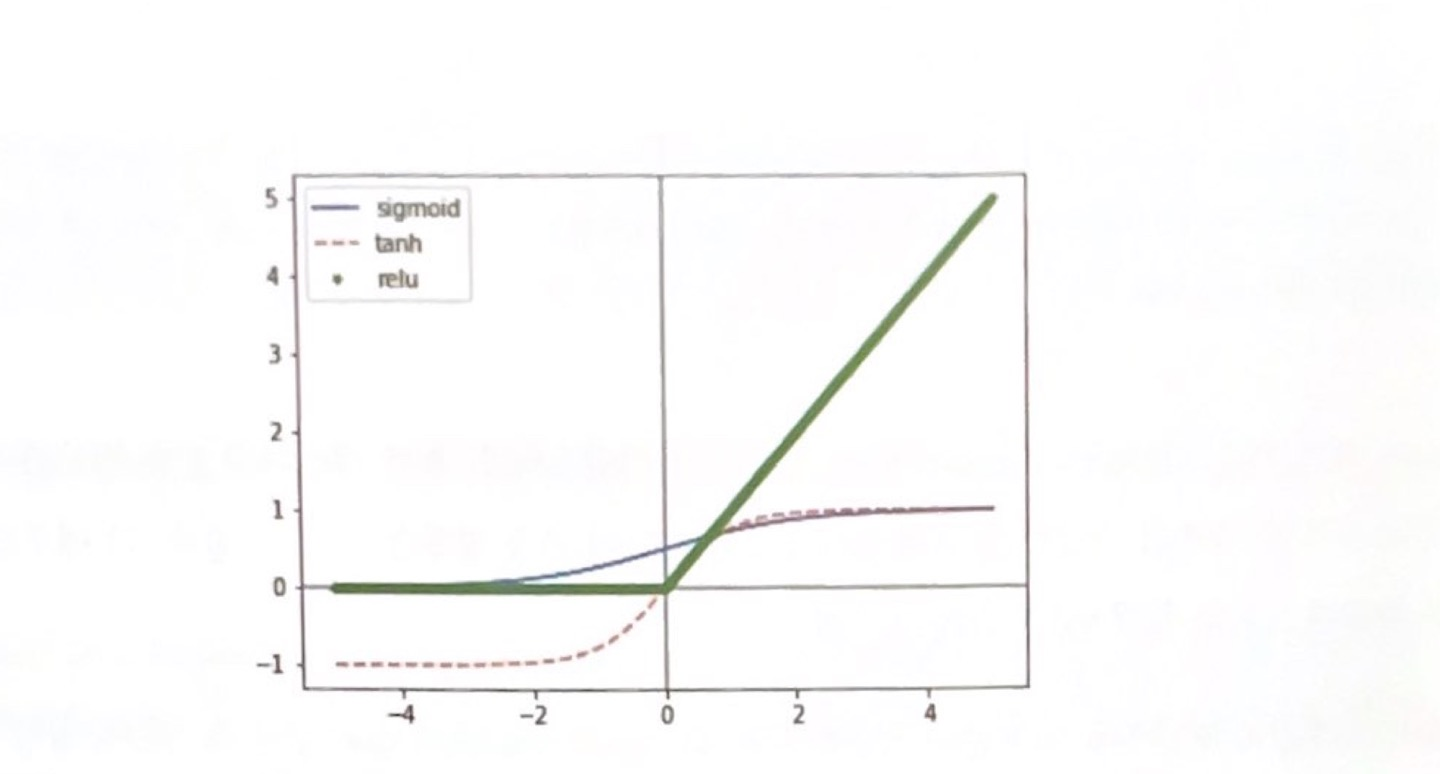

In [ ]:
#모델 학습
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25) #훈련 데이터의 25%를 검증 데이터로 사용하기 위해 validation_split = 0.25 추가

Epoch 1/25
10/10 [==============================] - 1s 22ms/step - loss: 3.4062 - val_loss: 1.3222
Epoch 2/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7889 - val_loss: 1.2282
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.7286 - val_loss: 1.1326
Epoch 4/25
10/10 [==============================] - 0s 9ms/step - loss: 0.6780 - val_loss: 0.9994
Epoch 5/25
10/10 [==============================] - 0s 8ms/step - loss: 0.6148 - val_loss: 0.9421
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.5572 - val_loss: 0.8938
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.5314 - val_loss: 0.8276
Epoch 8/25
10/10 [==============================] - 0s 7ms/step - loss: 0.4678 - val_loss: 0.7613
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.4135 - val_loss: 0.6743
Epoch 10/25
10/10 [==============================] - 0s 7ms/step - loss: 0.3601 - val_loss: 0.5861
Epoch 11/25
10/10 

model.fit()에 validation_split이라는 인수를 추가했다. 

훈련 데이터의 25%를 검증 데이터로 사용하기 위해 validation_split = 0.25를 추가했다.

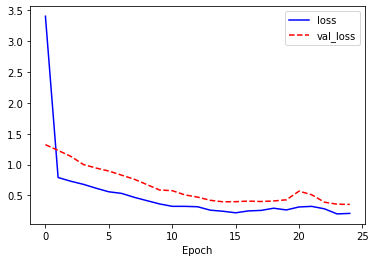

In [ ]:
#학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#회귀 모델 평가
model.evaluate(train_X, train_Y)
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 5ms/step - loss: 0.2373


0.23726806044578552

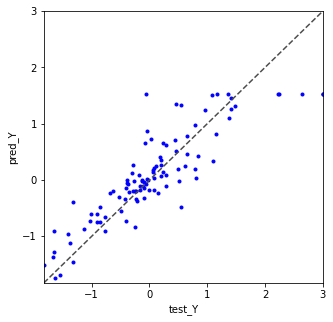

In [ ]:
#실제 주택 가격과 예측 주택 가격을 1:1로 비교

pred_Y = model.predict(test_X)

plt.figure(figsize = (5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

#x = y에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls = "--", c = ".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

검증 데이터와 테스트 데이터에 대해 모두 좋은 예측 성적을 내려면 어떻게 해야될까?

네트워크가 훈련 데이터에 과적합하지 않도록 학습 도중에 끼어들어 학습을 멈춰야 한다.

이때 콜백(allback) 함수를 사용한다. 콜백 함수는 모델의 성능 지표가 설정한 에포크동안 개선되지 않을 때 조기 종료할 수 있는 함수이다. 
콜백 함수는 모델 학습 할 때 에포크가 끝날 때마다 호출된다.

model.fit() 함수에 callback 인수를 사용해 콜백 함수의 리스트를 지정할 수 있다.

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13,)),
                             tf.keras.layers.Dense(units = 39, activation = 'relu'),
                             tf.keras.layers.Dense(units = 26, activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07), loss = 'mse')

history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_loss')])

Epoch 1/25
10/10 [==============================] - 1s 27ms/step - loss: 2.1646 - val_loss: 0.9294
Epoch 2/25
10/10 [==============================] - 0s 8ms/step - loss: 0.4191 - val_loss: 0.5369
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.2808 - val_loss: 0.4842
Epoch 4/25
10/10 [==============================] - 0s 8ms/step - loss: 0.2666 - val_loss: 0.3992
Epoch 5/25
10/10 [==============================] - 0s 8ms/step - loss: 0.2016 - val_loss: 0.3450
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.2078 - val_loss: 0.3214
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2059 - val_loss: 0.3377
Epoch 8/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1696 - val_loss: 0.2881
Epoch 9/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1822 - val_loss: 0.3413
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1659 - val_loss: 0.3174
Epoch 11/25
10/10 

콜백 함수의 리스트에 들어간 함수는 tf.keras.callbacks.EarlyStopping이다. patience는 몇 번의 에포크를 기준으로 할 것인지, monitor는 어떤 값을 지켜볼 것인지에 대한 인수이다.

위에서는 3번의 에포크를 기준으로 설정했다. 8 에포크의 최고 기록인 0.2881를 갱신하지 못하여 11 에포크에서 학습이 종료되었다.

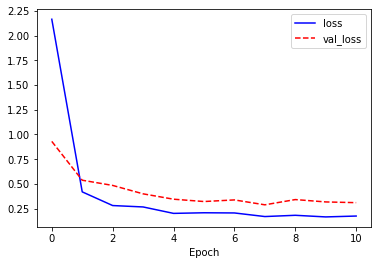

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 5ms/step - loss: 0.1599


0.15990978479385376

콜백 함수를 사용하지 않은 모델의 값인 0.2372 보다 낮은 0.1599이 출력되는 것을 볼 수 있다.

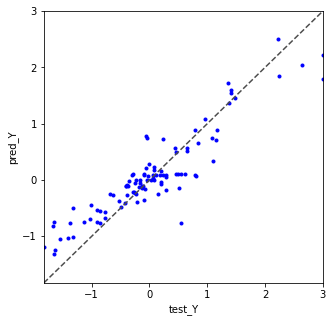

In [ ]:
# 실제 주택 가격과 에측 주택 가격 1:1 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize = (5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls = "--", c = ".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

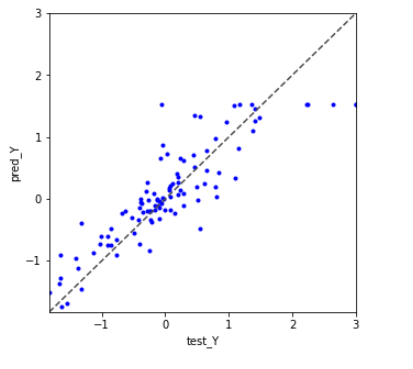

콜백 함수 사용하지 않았을 때의 그래프

미세하지만 이전 모델의 결과에 비해 결과값의 분산이 좁아진 것을 확인할 수 있다.